In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_colwidth', None)
import matplotlib
from adjustText import adjust_text

matplotlib.rcParams['pdf.fonttype'] = 42

In [6]:
s34fkv12_jbPSI = pd.read_csv('/Desktop/Juncbase_ttest/nonredundant_JuncBase_wt_laczvsS34Fkv12_PSI.tsv', sep='\t')
s34flacz_jbPSI = pd.read_csv('/Desktop/Juncbase_ttest/nonredundant_JuncBase_wt_laczvsS34Flacz_PSI.tsv', sep='\t')
wtkv12_jbPSI = pd.read_csv('/Desktop/Juncbase_ttest/nonredundant_JuncBase_wt_laczvswtkv12_PSI.tsv', sep='\t')
wtkv12_jbPSI.head()

/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/586643129.py:1: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  s34fkv12_jbPSI = pd.read_csv('/Users/selammehreteab/Desktop/Juncbase_ttest/nonredundant_JuncBase_wt_laczvsS34Fkv12_PSI.tsv', sep='\t')
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/586643129.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  s34flacz_jbPSI = pd.read_csv('/Users/selammehreteab/Desktop/Juncbase_ttest/nonredundant_JuncBase_wt_laczvsS34Flacz_PSI.tsv', sep='\t')
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/586643129.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  wtkv12_jbPSI = pd.read_csv('/Users/selammehreteab/Desktop/Juncbase_ttest/nonredundant_JuncBase_wt_laczvswtkv12_PSI.tsv', sep='\t')


,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,chr,strand,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,...,wt_kraswt_clone2_r2,wt_kraswt_clone2_r3,s34f_kraswt_clone2_r1,s34f_kraswt_clone2_r2,s34f_kraswt_clone2_r3,set1_med,set2_med,delta_val,raw_pval,corrected_pval
0,N,alternative_last_exon,NaN,chr21,+,"chr21:45171685-45171851,chr21:45171685-45173958;chr21:45171685-45180329",chr21:45171685-45175729,chr21:45180330-45180444,chr21:45175730-45176664,NaN,...,100.00,100.00,NaN,NaN,100.00,96.49,97.31,0.82,0.377508,0.856336
1,K,alternative_last_exon,ENSG00000166228.9,chr10,-,chr10:70884069-70885151;chr10:70882486-70885151,chr10:70884049-70885151,chr10:70882280-70882485,chr10:70883510-70884048,NaN,...,98.04,95.92,98.08,100.00,100.00,97.57,97.03,-0.54,0.429273,0.876499
2,N,alternative_last_exon,ENSG00000111371.16,chr12,-,"chr12:46196938-46197918,chr12:46196872-46197918,chr12:46196259-46197918;chr12:46189072-46197918",chr12:46197818-46197918,chr12:46183063-46189071,chr12:46197378-46197817,NaN,...,97.47,95.89,97.78,96.36,98.46,99.20,99.00,-0.20,1.000000,1.000000
3,K,alternative_last_exon,ENSG00000159842.15,chr17,-,chr17:1050635-1056997,chr17:1056110-1056997,chr17:1050537-1050634,chr17:1055283-1056109,NaN,...,100.00,93.33,NaN,NaN,90.91,100.00,100.00,0.00,0.819907,0.984617
4,K,alternative_last_exon,ENSG00000180329.14,chr17,-,chr17:44682389-44683871;chr17:44673526-44683871,chr17:44682139-44683871,chr17:44673069-44673525,chr17:44681731-44682138,NaN,...,100.00,96.77,96.30,100.00,97.14,97.43,100.00,2.57,0.044026,0.856336


In [7]:
working_s34flacz = s34flacz_jbPSI.loc[:,s34flacz_jbPSI.columns.isin(['#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                                    'as_event_type', 'gene_name', 'delta_val', 'corrected_pval',
                                                                           'exclusion_junctions', 'inclusion_junctions', 'exclusion_exons',
                                                                           'inclusion_exons', 'intron-exon_junctions', 'neighboring_constitutive_exons'])]
working_wtkv12 = wtkv12_jbPSI.loc[:,wtkv12_jbPSI.columns.isin(['#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                                    'as_event_type', 'gene_name', 'delta_val', 'corrected_pval',
                                                                     'exclusion_junctions', 'inclusion_junctions', 'exclusion_exons',
                                                                           'inclusion_exons', 'intron-exon_junctions', 'neighboring_constitutive_exons'])]
working_s34fkv12 = s34fkv12_jbPSI.loc[:,s34fkv12_jbPSI.columns.isin(['#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                                    'as_event_type', 'gene_name', 'delta_val', 'corrected_pval',
                                                                          'exclusion_junctions', 'inclusion_junctions', 'exclusion_exons',
                                                                           'inclusion_exons', 'intron-exon_junctions', 'neighboring_constitutive_exons'])]
working_s34fkv12.head(3)

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,corrected_pval
0,N,alternative_last_exon,ENSG00000087470.18,chr12:49326159-49327226,chr12:49326159-49326667,chr12:49327227-49327327,chr12:49326668-49326720,NaN,NaN,0.00,0.660538
1,N,alternative_last_exon,NaN,chr4:145515014-145546702,chr4:145515014-145539803,chr4:145546703-145546924,chr4:145539804-145540061,NaN,NaN,0.21,0.986246
2,K,alternative_last_exon,ENSG00000187954.12,chr8:144453461-144464808,chr8:144464613-144464808,chr8:144453222-144453460,chr8:144463817-144464612,NaN,NaN,0.00,0.660538


In [8]:
with open ('/Desktop/gencode.v33.primary_assembly.annotation.gtf') as f:
    gtf = list(f)

gtf = [x for x in gtf if not x.startswith('#')]
gtf = [x for x in gtf if 'gene_name "' in x]

#grab everything that has gene ID and gene name
#only get lines with gene id and gene name
# gtf = [x for x in gtf if 'gene id "' in x and 'gene_name "' in x]
gtf_list = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))
gtfset = set(gtf_list)
gtfdict = dict(gtfset)
len(gtfset)

60721

In [9]:
dflist = [working_s34flacz, working_wtkv12, working_s34fkv12]

for df in dflist:
    df['GeneName'] = df['gene_name'].map(gtfdict)

/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/3069465893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GeneName'] = df['gene_name'].map(gtfdict)
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/3069465893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GeneName'] = df['gene_name'].map(gtfdict)
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/3069465893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [10]:
s34flacz_nas = working_s34flacz.loc[(working_s34flacz['GeneName'].isna()) 
                       & (working_s34flacz['corrected_pval'] < 0.25)
                        & (abs(working_s34flacz['delta_val'])>=10)
                      & (working_s34flacz['as_event_type'] != 'jcn_only_AA')
                      & (working_s34flacz['as_event_type'] != 'jcn_only_AD')]

wtkv12_nas = working_wtkv12.loc[(working_wtkv12['GeneName'].isna()) 
                       & (working_wtkv12['corrected_pval'] < 0.25)
                        & (abs(working_wtkv12['delta_val'])>=10)
                      & (working_wtkv12['as_event_type'] != 'jcn_only_AA')
                      & (working_wtkv12['as_event_type'] != 'jcn_only_AD')]

s34fkv12_nas = working_s34fkv12.loc[(working_s34fkv12['GeneName'].isna()) 
                       & (working_s34fkv12['corrected_pval'] < 0.25)
                        & (abs(working_s34fkv12['delta_val'])>=10)
                      & (working_s34fkv12['as_event_type'] != 'jcn_only_AA')
                      & (working_s34fkv12['as_event_type'] != 'jcn_only_AD')]

#s34fkv12_nas.head()

In [7]:
with pd.ExcelWriter('/Desktop/Juncbase_NANs.xlsx') as writer:  
    s34flacz_nas.to_excel(writer, sheet_name='s34flacz_nas')
    wtkv12_nas.to_excel(writer, sheet_name='wtkv12_nas')
    s34fkv12_nas.to_excel(writer, sheet_name='s34fkv12_nas')

In [11]:
#load CSV of these events with gene names manually filled in
named_s34flacz = pd.read_csv('/Downloads/s34flacz_nas - s34flacz_nas.csv')
named_wtkv12 = pd.read_csv('/Downloads/wtkv12_nas - wtkv12_nas.csv')
named_s34fkv12 = pd.read_csv('/Downloads/s34fkv12_nas - s34fkv12_nas.csv')
# named_s34fkv12

In [12]:
#make dictionary of manually filled events to junctions
nameds34flacz_dict = named_s34flacz.set_index('exclusion_junctions')['GeneName'].to_dict()
namedwtkv12_dict = named_wtkv12.set_index('exclusion_junctions')['GeneName'].to_dict()
nameds34fkv12_dict = named_s34fkv12.set_index('exclusion_junctions')['GeneName'].to_dict()

In [13]:
#map each exclusion jnction to gene name and check for NAs remaining 
#There are one or two in S34F LACZ and S34F KV12 because the events didnt have any reads on IGV 
#or mapped to weird intergenic regioms

s34flacz_nas['GeneName'] = s34flacz_nas['exclusion_junctions'].map(nameds34flacz_dict)
wtkv12_nas['GeneName'] = wtkv12_nas['exclusion_junctions'].map(namedwtkv12_dict)
s34fkv12_nas['GeneName'] = s34fkv12_nas['exclusion_junctions'].map(nameds34fkv12_dict)

#remove NA values in dataframes of manually named genes 

nona_working_s34flacz = working_s34flacz.loc[(working_s34flacz['GeneName'].notna())]
named_s34flacz = pd.concat([nona_working_s34flacz, s34flacz_nas])

nona_working_wtkv12 = working_wtkv12.loc[(working_wtkv12['GeneName'].notna())]
named_wtkv12 = pd.concat([nona_working_wtkv12, wtkv12_nas])

nona_working_s34fkv12 = working_s34fkv12.loc[(working_s34fkv12['GeneName'].notna())]
named_s34fkv12 = pd.concat([nona_working_s34fkv12, s34fkv12_nas])
# named_s34fkv12.head()
# named_s34fkv12_filtered = named_s34fkv12[named_s34fkv12['GeneName'] == 'CTNNB1']
# named_s34fkv12_filtered

/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/28427484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s34flacz_nas['GeneName'] = s34flacz_nas['exclusion_junctions'].map(nameds34flacz_dict)
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/28427484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s34fkv12_nas['GeneName'] = s34fkv12_nas['exclusion_junctions'].map(nameds34fkv12_dict)


In [14]:
# check for novel IR events to filter out
s34flacz_novelIR = working_s34flacz.loc[(working_s34flacz['as_event_type'] == 'intron_retention') &
                    (working_s34flacz['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'N')&
                     (working_s34flacz['GeneName'].notna()) & 
                                       (working_s34flacz['corrected_pval'] <0.25)]
s34flacz_novelIR 
wtkv12_novelIR = working_wtkv12.loc[(working_wtkv12['as_event_type'] == 'intron_retention') &
                    (working_wtkv12['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'N') &
                                   (working_wtkv12['GeneName'].notna()) &
                                   (working_wtkv12['corrected_pval'] <0.25)]
wtkv12_novelIR 
# 0 events

s34fkv12_novelIR = working_s34fkv12.loc[(working_s34fkv12['as_event_type'] == 'intron_retention') &
                    (working_s34fkv12['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'N') &
                                       (working_s34fkv12['GeneName'].notna()) &
                                       (working_s34fkv12['corrected_pval'] <0.25)]
s34fkv12_novelIR

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,corrected_pval,GeneName


In [15]:
#there are some remaining unnamed gene events unannotated manually because there were no reads on IGV for the junctions
#drop that as well as junction only event types. 

nojcnonly_named_s34flacz = named_s34flacz.loc[(named_s34flacz['as_event_type'] != 'jcn_only_AD') &
                                           (named_s34flacz['as_event_type'] != 'jcn_only_AA') &
                                               (named_s34flacz['GeneName'].notna())]


nojcnonly_named_wtkv12 = named_wtkv12.loc[(named_wtkv12['as_event_type'] != 'jcn_only_AD') &
                                           (named_wtkv12['as_event_type'] != 'jcn_only_AA') &
                                               (named_wtkv12['GeneName'].notna())]

nojcnonly_named_s34fkv12 = named_s34fkv12.loc[(named_s34fkv12['as_event_type'] != 'jcn_only_AD') &
                                           (named_s34fkv12['as_event_type'] != 'jcn_only_AA') &
                                               (named_s34fkv12['GeneName'].notna())]

dflist = [nojcnonly_named_s34flacz, nojcnonly_named_wtkv12, nojcnonly_named_s34fkv12]

for df in dflist:
    df['neglogp'] = -np.log10(df['corrected_pval'])

/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/4106113232.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neglogp'] = -np.log10(df['corrected_pval'])
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/4106113232.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neglogp'] = -np.log10(df['corrected_pval'])
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/4106113232.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

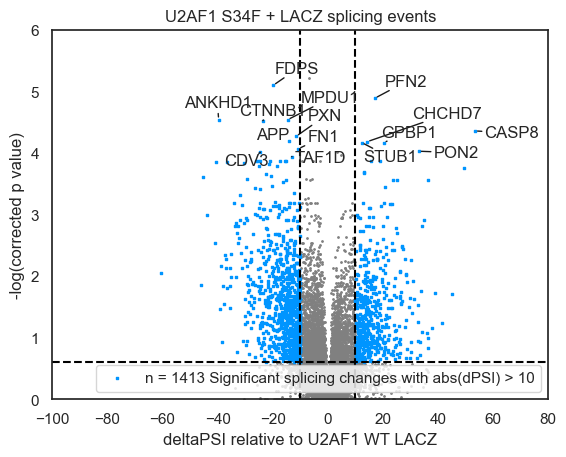

In [89]:
#specify coordinates for significant dots and coordinates for labeling gene names
sns.set_theme(style='white')

sig1 = nojcnonly_named_s34flacz[(abs(nojcnonly_named_s34flacz['delta_val'])>=10)
                                &(nojcnonly_named_s34flacz['neglogp']> 0.60205999132)]
sig1text = nojcnonly_named_s34flacz[(abs(nojcnonly_named_s34flacz['delta_val'])>=10)
                                    &(nojcnonly_named_s34flacz['neglogp']>1.30102999566)]
sig1text = sig1text.sort_values(by=['neglogp'], ascending=False)
sig1text = sig1text.head(n=15)

#u2af1 s34f lacz vs wt lacz

plt.scatter(x=nojcnonly_named_s34flacz['delta_val'],y=nojcnonly_named_s34flacz['neglogp'], s=1, color='gray')
plt.scatter(x=sig1['delta_val'],y=sig1['neglogp'],s=4,
            label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig1))),
            color='#0095FF', marker = 's')

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(corrected p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(0.6,color="black",linestyle="--")
plt.title('U2AF1 S34F + LACZ splicing events')
plt.ylim(0, 6) 
plt.xlim(-100, 80)

texts1 = []
for i in range(len(sig1text)):
    #if sig2text.iloc[i].delta_val < 61:
    texts1.append(plt.text(x= sig1text.iloc[i].delta_val, y=sig1text.iloc[i].neglogp, s= sig1text.iloc[i].GeneName))
    
adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'), force_text=(0.3,0.4))

plt.legend(loc='lower right', facecolor="white")
plt.savefig("/Downloads/bothclones_splicing_volcano_s34flacz.pdf", format='pdf', transparent=True)


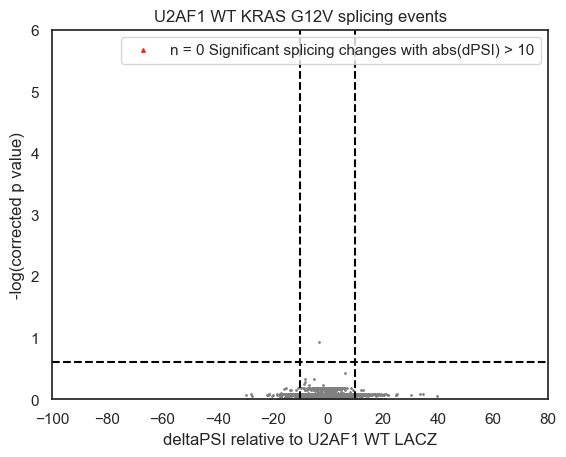

In [52]:
sig2 = nojcnonly_named_wtkv12[(abs(nojcnonly_named_wtkv12['delta_val'])>=10)
                              &(nojcnonly_named_wtkv12['neglogp']> 0.60205999132)]
sig2text = nojcnonly_named_wtkv12[(abs(nojcnonly_named_wtkv12['delta_val'])>=10)
                                  &(nojcnonly_named_wtkv12['neglogp']> 0.60205999132)]
sig2text = sig2text.sort_values(by=['neglogp'], ascending=False)
sig2text = sig2text.head(n=15)

plt.scatter(x=nojcnonly_named_wtkv12['delta_val'],y=nojcnonly_named_wtkv12['neglogp'], s=1, color='gray')
plt.scatter(x=sig2['delta_val'],y=sig2['neglogp'],s=6,label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig2))),color='#FF2501', marker='^')

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(corrected p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(0.6,color="black",linestyle="--")
plt.title('U2AF1 WT KRAS G12V splicing events')
# plt.yticks(range(-1, 15))
# plt.xticks([-60, -50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50, 60])
plt.ylim(0, 6) 
plt.xlim(-100, 80)

texts1 = []
for i in range(len(sig2text)):
    #if sig2text.iloc[i].delta_val < 61:
    texts1.append(plt.text(x= sig2text.iloc[i].delta_val, y=sig2text.iloc[i].neglogp, s= sig2text.iloc[i].GeneName))
    
adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'))

plt.legend(loc='upper right', facecolor="white")
plt.savefig("/Downloads/bothclones_splicing_volcano_wtlacz.pdf", format='pdf', transparent=True)


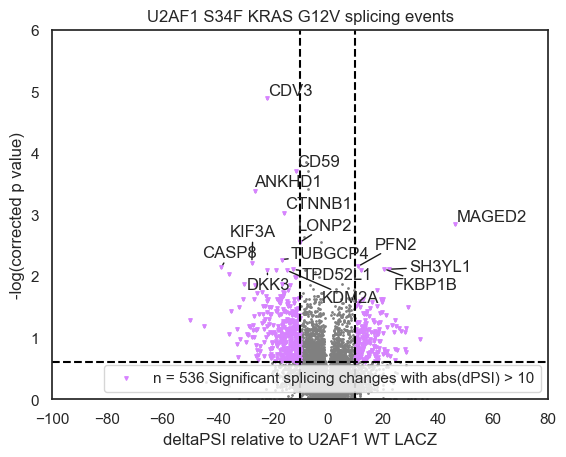

In [53]:
sig3 = nojcnonly_named_s34fkv12[(abs(nojcnonly_named_s34fkv12['delta_val'])>=10)&
                                (nojcnonly_named_s34fkv12['neglogp']> 0.60205999132)]
sig3text = nojcnonly_named_s34fkv12[(abs(nojcnonly_named_s34fkv12['delta_val'])>=10)&
                                    (nojcnonly_named_s34fkv12['neglogp']> 0.60205999132)]
sig3text = sig3text.sort_values(by=['neglogp'], ascending=False)
sig3text = sig3text.head(n=15)

#u2af1 s34f kras g12v vs u2af1 wt lacz
#plot volcano plot with lines marking deltapsi 10 and sig p value

plt.scatter(x=nojcnonly_named_s34fkv12['delta_val'],y=nojcnonly_named_s34fkv12['neglogp'], s=1, color='gray')
plt.scatter(x=sig3['delta_val'],y=sig3['neglogp'],s=6,
            label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig3))),
            color='#D783FF', marker="v")

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(corrected p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(0.6,color="black",linestyle="--")
plt.title('U2AF1 S34F KRAS G12V splicing events')
# plt.yticks(range(-1, 15))
# plt.xticks([-60, -50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50, 60])
plt.ylim(0, 6) 
plt.xlim(-100, 80)

texts1 = []
for i in range(len(sig3text)):
    texts1.append(plt.text(x= sig3text.iloc[i].delta_val, y=sig3text.iloc[i].neglogp, s= sig3text.iloc[i].GeneName))
    
adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'), force_text=(0.3,0.4))

plt.legend(loc='lower right', facecolor="white")
plt.savefig("/Downloads/bothclones_splicing_volcanos34fkv12.pdf", format='pdf', transparent=True)


In [54]:
nojcnonly_named_s34fkv12.to_csv('/Users/selammehreteab/Desktop/nojcnonly_named_s34fkv12.csv', index=False)
nojcnonly_named_s34flacz.to_csv('/Users/selammehreteab/Desktop/nojcnonly_named_s34flacz.csv', index=False)
nojcnonly_named_wtkv12.to_csv('/Users/selammehreteab/Desktop/nojcnonly_named_wtkv12.csv', index=False)
# df.to_csv('file_name.csv', index=False)

In [55]:
s34flaczdict  = {}
wtkv12dict = {}
s34fkv12dict = {}

dflist = [[nojcnonly_named_s34flacz, s34flaczdict],[nojcnonly_named_wtkv12, wtkv12dict], 
          [nojcnonly_named_s34fkv12, s34fkv12dict]]

for pair in dflist:
    pair[0] = pair[0].loc[(pair[0]['corrected_pval'] < 0.25) &(abs(pair[0]['delta_val']) >=10)]
#     filter for corrected p value significant. then count # events in these categories

    AltAcc = len(pair[0].loc[(pair[0]['as_event_type'] == 'alternative_acceptor')])
    altDon = len(pair[0].loc[(pair[0]['as_event_type'] == 'alternative_donor')])
    alt1stE = len(pair[0].loc[(pair[0]['as_event_type'] == 'alternative_first_exon')])
    altLE = len(pair[0].loc[(pair[0]['as_event_type'] == 'alternative_last_exon')])
    cass = len(pair[0].loc[(pair[0]['as_event_type'] == 'cassette')])
    corcass = len(pair[0].loc[(pair[0]['as_event_type'] == 'coord_cassette')])
    
    #for intron retention, only select events from known/annotated junctions
    kIR = len(pair[0].loc[(pair[0]['as_event_type'] == 'intron_retention') & 
                 (pair[0]['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'K')])
    ME = len(pair[0].loc[(pair[0]['as_event_type'] == 'mutually_exclusive')])
    
    #assign numbers to the dictionary keys
    pair[1]['Alternative acceptor'] = AltAcc
    pair[1]['Alternative donor'] = altDon
    pair[1]['Alternative first exon'] = alt1stE
    pair[1]['Alternative last exon'] = altLE
    pair[1]['Cassette'] = cass
    pair[1]['Intron retention'] = kIR
    pair[1]['Coordinate cassette'] = corcass
    pair[1]['Mutually exclusive'] = ME

# {'alternative_acceptor',
#  'alternative_donor',
#  'alternative_first_exon',
#  'alternative_last_exon',
#  'cassette',
#  'coord_cassette',
#  'intron_retention',
#  'jcn_only_AA',
#  'jcn_only_AD',
#  'mutually_exclusive'}
s34fkv12dict

{'Alternative acceptor': 51,
 'Alternative donor': 12,
 'Alternative first exon': 79,
 'Alternative last exon': 92,
 'Cassette': 298,
 'Intron retention': 0,
 'Coordinate cassette': 1,
 'Mutually exclusive': 3}

In [56]:
#concatenate genotypes together
#assemble dataframes

s34flacz_ttestevents = pd.DataFrame.from_dict([s34flaczdict])
wtkv12_ttestevents = pd.DataFrame.from_dict([wtkv12dict])
s34fkv12_ttestevents = pd.DataFrame.from_dict([s34fkv12dict])

wtkv12_ttestevents.index = ['U2AF1 WT KRAS G12V'] 
s34flacz_ttestevents.index = ['U2AF1 S34F LACZ'] 
s34fkv12_ttestevents.index = ['U2AF1 S34F KRAS G12V']

#concat frames
frames = [wtkv12_ttestevents, s34flacz_ttestevents, s34fkv12_ttestevents]

jbttestconcat = pd.concat(frames)
jbttestconcat['Sum'] = jbttestconcat.sum(axis=1)
jbttestconcat

,Alternative acceptor,Alternative donor,Alternative first exon,Alternative last exon,Cassette,Intron retention,Coordinate cassette,Mutually exclusive,Sum
U2AF1 WT KRAS G12V,0,0,0,0,0,0,0,0,0
U2AF1 S34F LACZ,209,104,180,212,636,44,18,7,1410
U2AF1 S34F KRAS G12V,51,12,79,92,298,0,1,3,536


In [57]:
for i, row in jbttestconcat.iterrows():
    jbttestconcat.at[i, 'Alternative acceptor'] = jbttestconcat.at[i, 'Alternative acceptor']/jbttestconcat.at[i, 'Sum']
    jbttestconcat.at[i, 'Alternative donor'] = jbttestconcat.at[i, 'Alternative donor']/jbttestconcat.at[i, 'Sum']
    jbttestconcat.at[i, 'Alternative first exon'] = jbttestconcat.at[i, 'Alternative first exon']/jbttestconcat.at[i, 'Sum']
    jbttestconcat.at[i, 'Alternative last exon'] = jbttestconcat.at[i, 'Alternative last exon']/jbttestconcat.at[i, 'Sum']
    jbttestconcat.at[i, 'Cassette'] = jbttestconcat.at[i, 'Cassette']/jbttestconcat.at[i,'Sum']
    jbttestconcat.at[i, 'Intron retention'] = jbttestconcat.at[i, 'Intron retention']/jbttestconcat.at[i,'Sum']
    jbttestconcat.at[i, 'Coordinate cassette'] = jbttestconcat.at[i, 'Coordinate cassette']/jbttestconcat.at[i,'Sum']
    jbttestconcat.at[i, 'Mutually exclusive'] = jbttestconcat.at[i, 'Mutually exclusive']/jbttestconcat.at[i,'Sum']
    
jbttestconcat

/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/901200222.py:2: RuntimeWarning: invalid value encountered in scalar divide
  jbttestconcat.at[i, 'Alternative acceptor'] = jbttestconcat.at[i, 'Alternative acceptor']/jbttestconcat.at[i, 'Sum']
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/901200222.py:3: RuntimeWarning: invalid value encountered in scalar divide
  jbttestconcat.at[i, 'Alternative donor'] = jbttestconcat.at[i, 'Alternative donor']/jbttestconcat.at[i, 'Sum']
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/901200222.py:4: RuntimeWarning: invalid value encountered in scalar divide
  jbttestconcat.at[i, 'Alternative first exon'] = jbttestconcat.at[i, 'Alternative first exon']/jbttestconcat.at[i, 'Sum']
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/901200222.py:5: RuntimeWarning: invalid value encountered in scalar divide
  jbttestconcat.at[i, 'Alternative last exon'] = jbttestconcat.at[i, 'Alternative last ex

,Alternative acceptor,Alternative donor,Alternative first exon,Alternative last exon,Cassette,Intron retention,Coordinate cassette,Mutually exclusive,Sum
U2AF1 WT KRAS G12V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
U2AF1 S34F LACZ,0.148227,0.073759,0.127660,0.150355,0.451064,0.031206,0.012766,0.004965,1410
U2AF1 S34F KRAS G12V,0.095149,0.022388,0.147388,0.171642,0.555970,0.000000,0.001866,0.005597,536


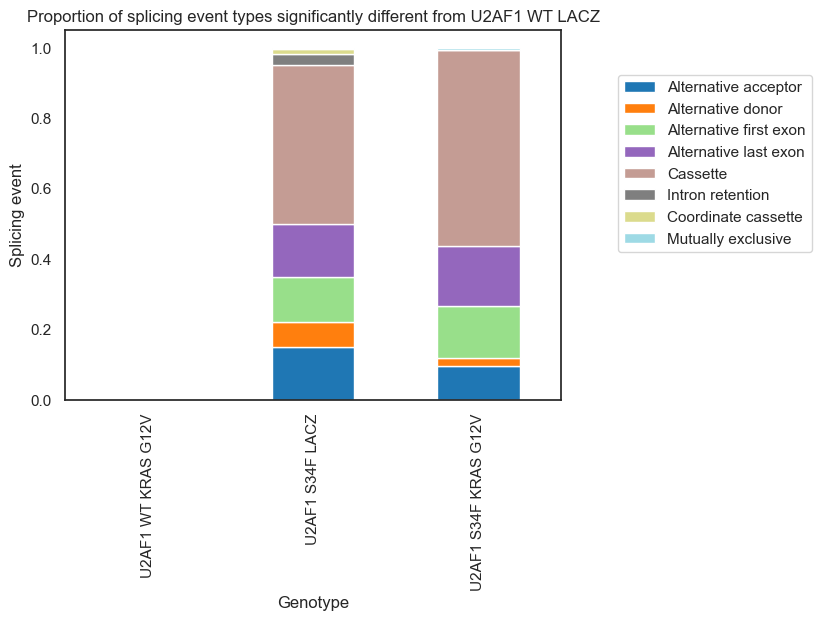

In [59]:
jbttestconcat_plot = jbttestconcat.drop(['Sum'], axis=1)


ax = jbttestconcat_plot.plot(kind='bar', stacked=True, cmap='tab20')

# labels for x & y axis
plt.xlabel('Genotype')
plt.ylabel('Splicing event')
 
# title of plot
plt.title('Proportion of splicing event types significantly different from U2AF1 WT LACZ')


# psi_pvalue_s34flaczdf.plot(kind='bar', stacked=True, palette = 'turbo')
plt.legend(bbox_to_anchor=(1.1, 0.9))
plt.savefig("/Users/selammehreteab/Downloads/bothclones_proportion_splicing_events.pdf", format='pdf', transparent=True)


In [60]:
s34flacznovelsdict  = {}
wtkv12novelsdict = {}
s34fkv12novelsdict = {}

dflist = [[nojcnonly_named_wtkv12, wtkv12novelsdict],[nojcnonly_named_s34flacz, s34flacznovelsdict], 
          [nojcnonly_named_s34fkv12, s34fkv12novelsdict]]

#count number of things per event for each genotype

for pair in dflist:
#     pair[0] = pair[0][pair[0]['Gene Name'].isin(KRASDNset)]
    pair[0] = pair[0].loc[(pair[0]['corrected_pval'] < 0.25)&(abs(pair[0]['delta_val']) >=10)]
    known = len(pair[0].loc[(pair[0]['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'K') & 
                            (pair[0]['as_event_type'] != 'jcn_only_AA') &  
                            (pair[0]['as_event_type'] != 'jcn_only_AD')])
    novel = len(pair[0].loc[(pair[0]['#Contains_Novel_or_Only_Known(Annotated)_Junctions'] == 'N') & 
                            (pair[0]['as_event_type'] != 'jcn_only_AA') &  
                            (pair[0]['as_event_type'] != 'jcn_only_AD') & 
                           (pair[0]['as_event_type'] != 'intron_retention')])         
    
    pair[1]['Known splice junction'] = known
    pair[1]['Novel splice junction'] = novel

#assemble dataframes
wtkv12_ttestKN = pd.DataFrame.from_dict([wtkv12novelsdict])
s34flacz_ttestKN = pd.DataFrame.from_dict([s34flacznovelsdict])
s34fkv12_ttestKN = pd.DataFrame.from_dict([s34fkv12novelsdict])

wtkv12_ttestKN.index = ['U2AF1 WT KRAS G12V'] 
s34flacz_ttestKN.index = ['U2AF1 S34F LACZ'] 
s34fkv12_ttestKN.index = ['U2AF1 S34F KRAS G12V']

#concat frames
frames = [wtkv12_ttestKN, s34flacz_ttestKN, s34fkv12_ttestKN]

jbttestconcat = pd.concat(frames)

jbttestconcat['Sum'] = jbttestconcat.sum(axis=1)
jbttestconcat

,Known splice junction,Novel splice junction,Sum
U2AF1 WT KRAS G12V,0,0,0
U2AF1 S34F LACZ,530,880,1410
U2AF1 S34F KRAS G12V,193,343,536


In [61]:

# #transform each value to get %

for i, row in jbttestconcat.iterrows():
    jbttestconcat.at[i, 'Known splice junction'] = jbttestconcat.at[i, 'Known splice junction']/jbttestconcat.at[i, 'Sum']
    jbttestconcat.at[i, 'Novel splice junction'] = jbttestconcat.at[i, 'Novel splice junction']/jbttestconcat.at[i, 'Sum']



jbttestconcat

/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/63929550.py:4: RuntimeWarning: invalid value encountered in scalar divide
  jbttestconcat.at[i, 'Known splice junction'] = jbttestconcat.at[i, 'Known splice junction']/jbttestconcat.at[i, 'Sum']
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/63929550.py:5: RuntimeWarning: invalid value encountered in scalar divide
  jbttestconcat.at[i, 'Novel splice junction'] = jbttestconcat.at[i, 'Novel splice junction']/jbttestconcat.at[i, 'Sum']


,Known splice junction,Novel splice junction,Sum
U2AF1 WT KRAS G12V,NaN,NaN,0
U2AF1 S34F LACZ,0.375887,0.624113,1410
U2AF1 S34F KRAS G12V,0.360075,0.639925,536


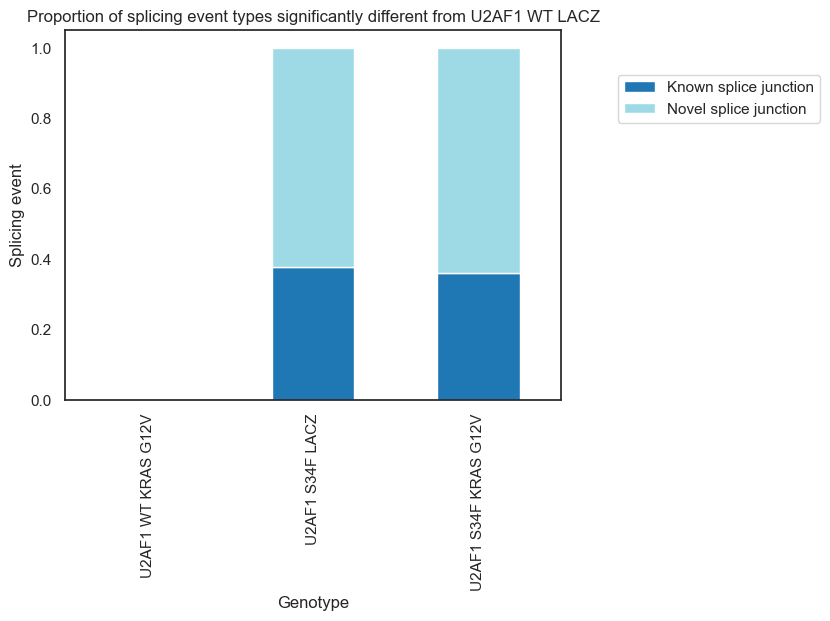

In [62]:
jbttestconcat_plot = jbttestconcat.drop(['Sum'], axis=1)
# create stacked bar chart for monthly temperatures
#add genotype column

ax = jbttestconcat_plot.plot(kind='bar', stacked=True, cmap='tab20')

# labels for x & y axis
plt.xlabel('Genotype')
plt.ylabel('Splicing event')
 
# title of plot
plt.title('Proportion of splicing event types significantly different from U2AF1 WT LACZ')


# psi_pvalue_s34flaczdf.plot(kind='bar', stacked=True, palette = 'turbo')
plt.legend(bbox_to_anchor=(1.1, 0.9))

In [43]:
#sort by deltaPSI, then keep the first entry (highest value absdeltaPSI)

#filter data frames by padj < 0.25
s34flacz_padj025 = nojcnonly_named_s34flacz.loc[(nojcnonly_named_s34flacz['corrected_pval'] < 0.25)]
wtkv12_padj025 = nojcnonly_named_wtkv12.loc[(nojcnonly_named_wtkv12['corrected_pval'] < 0.25)]
s34fkv12_padj025 = nojcnonly_named_s34fkv12.loc[(nojcnonly_named_s34fkv12['corrected_pval'] < 0.25)]

#take absolute value of dPSI
dflist = [s34flacz_padj025, wtkv12_padj025, s34fkv12_padj025]
for df in dflist:
    df['abs(dPSI)'] = abs(df['delta_val'])

#for duplciates, keep only highest deltapsi entry
#first sort by descending abspsi

s34flacz_padj025 = s34flacz_padj025.sort_values(['abs(dPSI)'], ascending=False)
wtkv12_padj025 = wtkv12_padj025.sort_values(['abs(dPSI)'], ascending=False)
s34fkv12_padj025 = s34fkv12_padj025.sort_values(['abs(dPSI)'], ascending=False)
    
#now, keep only the highest of a dup gene entry
s34flacz_unique = s34flacz_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)
wtkv12_unique = wtkv12_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)
s34fkv12_unique = s34fkv12_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)

s34flacz_unique.head(5)

# LDHA	0.640569	59.02

/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/3022148703.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs(dPSI)'] = abs(df['delta_val'])
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/3022148703.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs(dPSI)'] = abs(df['delta_val'])
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/3022148703.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,corrected_pval,GeneName,neglogp,abs(dPSI)
17922,K,cassette,ENSG00000204576.11,chr6:30557451-30561833;chr6:30558213-30561833,"chr6:30557451-30561327,chr6:30558213-30561327;chr6:30561509-30561833",NaN,chr6:30561328-30561508,NaN,NaN,-60.73,0.009032,PRR3,2.044216,60.73
48028,N,alternative_acceptor,ENSG00000064012.22,chr2:201258155-201266460;chr2:201258155-201260556,chr2:201258155-201266486,NaN,chr2:201260557-201266460;chr2:201266461-201266486,chr2:201266460-201266461;chr2:201266486-201266487,NaN,53.33,0.000044,CASP8,4.356547,53.33
42288,K,alternative_acceptor,ENSG00000122417.15,chr1:86348879-86352858,chr1:86352209-86352858,NaN,chr1:86348879-86352208,chr1:86348878-86348879,NaN,49.22,0.000178,ODF2L,3.749580,49.22
22793,K,cassette,ENSG00000151612.18,chr4:145761599-145764978;chr4:145761599-145764987;chr4:145761599-145764974;chr4:145761599-145763401,"chr4:145761599-145763089;chr4:145763123-145764987,chr4:145763123-145763401,chr4:145763123-145764974,chr4:145763123-145764978",NaN,chr4:145763090-145763122,NaN,NaN,-46.14,0.014171,ZNF827,1.848600,46.14
43731,K,alternative_acceptor,ENSG00000072415.9,chr14:67269784-67279249,chr14:67269784-67279017,NaN,chr14:67279018-67279249,chr14:67279249-67279250,NaN,-45.30,0.000247,MPP5,3.607303,45.30


In [44]:
# now convert to RNK file

#first only keep gene name and delta cols
s34flacz_RNK = s34flacz_unique.loc[:, s34flacz_unique.columns.isin(['GeneName', 'abs(dPSI)'])]
wtkv12_RNK = wtkv12_unique.loc[:, wtkv12_unique.columns.isin(['GeneName', 'abs(dPSI)'])]
s34fkv12_RNK = s34fkv12_unique.loc[:, s34fkv12_unique.columns.isin(['GeneName', 'abs(dPSI)'])]

dflist = [s34flacz_RNK, wtkv12_RNK, s34fkv12_RNK]
for df in dflist:
# then rename gene name to #Gene and reorder columns
    df = df.rename(columns = {'GeneName':'#Gene'}, inplace = True)
    
column_order = ['#Gene', 'abs(dPSI)']

s34flacz_reorder = s34flacz_RNK.reindex(column_order, axis = 1)
wtkv12_reorder = wtkv12_RNK.reindex(column_order, axis = 1)
s34fkv12_reorder = s34fkv12_RNK.reindex(column_order, axis = 1)

wtkv12_reorder.head(5)
# KRT6A	46.40

/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/2536703959.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'GeneName':'#Gene'}, inplace = True)


,#Gene,abs(dPSI)
21770,CDK7,3.26


/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/4149760471.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/4149760471.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s34flacz_RNK['Comparison'] = 'U2AF1 S34F LACZ'
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/4149760471.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

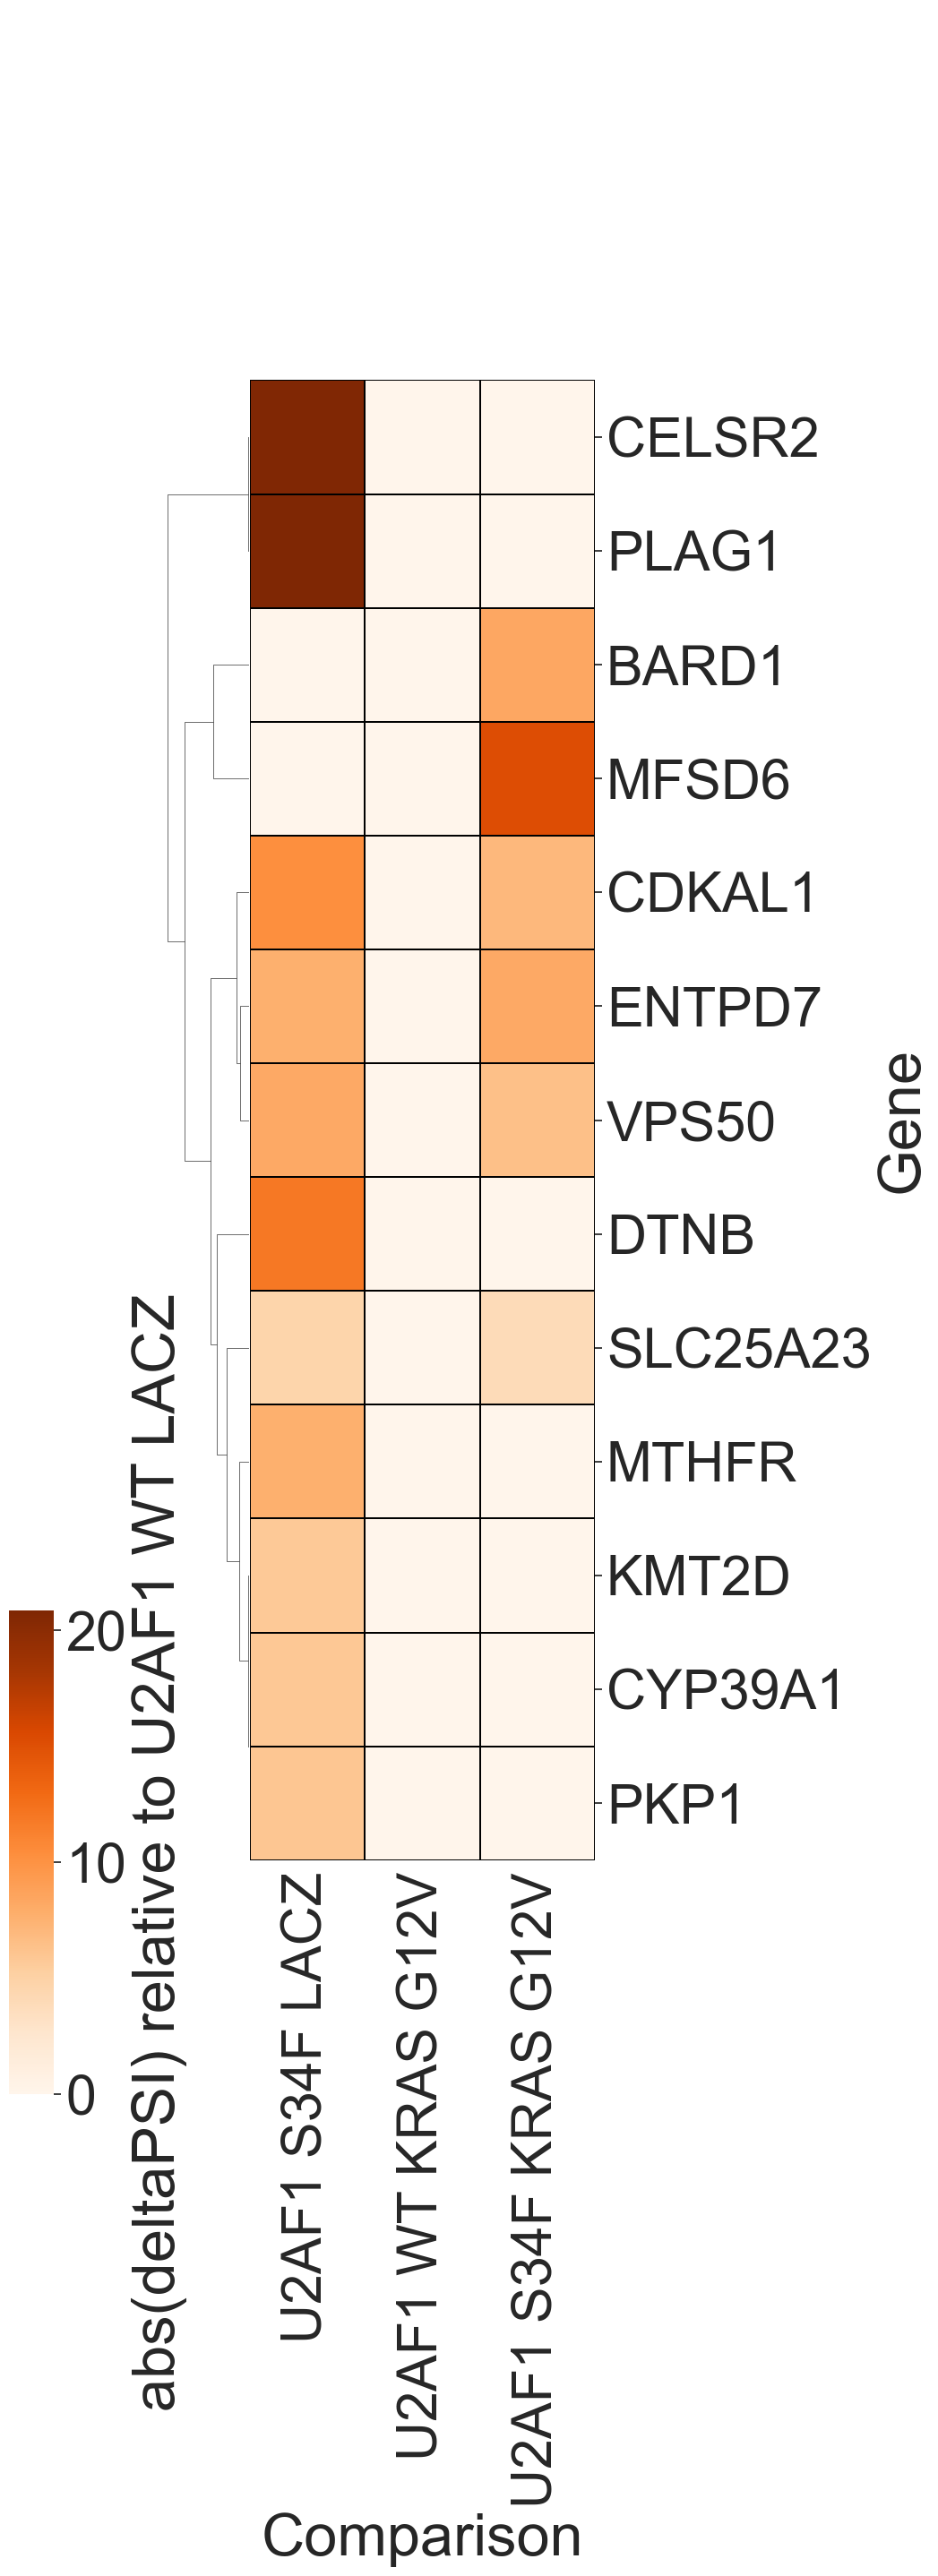

In [45]:
KRASDNstr = 'ABCB11,ABCG4,ACTC1,COQ8A,ADRA2C,AKR1B10,ALOX12B,AMBN,ARHGDIG,ARPP21,ASB7,ATP4A,ATP6V1B1,BARD1,BMPR1B,BRDT,BTG2,C5,CACNA1F,CACNG1,CALCB,CALML5,CAMK1D,CAPN9,CCDC106,VPS50,CCNA1,CCR8,CD207,CD40LG,CD80,CDH16,CDKAL1,CELSR2,CHRNG,CHST2,CKM,CLDN16,CLDN8,CLPS,CLSTN3,CNTFR,COL2A1,COPZ2,CPA2,CPB1,CPEB3,CYP11B2,CYP39A1,DCC,DLK2,DTNB,EDAR,EDN1,EDN2,EFHD1,EGF,ENTPD7,EPHA5,ZC2HC1C,TENT5C,FGF16,FGF22,FGFR3,FGGY,FSHB,GAMT,GDNF,GP1BA,GP2,GPR19,GPR3,GPRC5C,GRID2,GTF3C5,MACROH2A2,HNF1A,HSD11B2,HTR1B,HTR1D,IDUA,IFI44L,IFNG,IGFBP2,IL12B,IL5,INSL5,IRS4,ITGB1BP2,ITIH3,KCND1,KCNE2,KCNMB1,KCNN1,KCNQ2,KLHDC8A,KLK7,KLK8,KRT1,KRT13,KRT15,KRT4,KRT5,LFNG,LGALS7,LYPD3,MAGIX,MAST3,MEFV,MFSD6,KMT2D,MSH5,MTHFR,MX1,MYH7,MYO15A,MYOT,NGB,NOS1,NPHS1,NR4A2,NR6A1,NRIP2,NTF3,NUDT11,TENM2,OXT,P2RX6,P2RY4,PRKN,PAX3,PAX4,PCDHB1,PDCD1,PDE6B,PDK2,PKP1,PLAG1,PNMT,NPY4R,PRODH,PROP1,PTGFR,PTPRJ,RGS11,RIBC2,RSAD2,RYR1,RYR2,SCGB1A1,SCN10A,SELENOP,SERPINA10,SERPINB2,SGK1,SHOX2,SIDT1,SKIL,SLC12A3,SLC16A7,SLC25A23,SLC29A3,SLC30A3,SLC38A3,SLC5A5,SLC6A14,SLC6A3,SMPX,SNCB,SNN,SOX10,SPHK2,SPRR3,SPTBN2,SSTR4,STAG3,SYNPO,TAS2R4,TCF7L1,TCL1A,TEX15,TFAP2B,TFCP2L1,TFF2,TG,TGFB2,TGM1,THNSL2,THRB,TLX1,TNNI3,TSHB,UGT2B17,UPK3B,VPREB1,WNT16,YBX2,YPEL1,ZBTB16,ZNF112'
KRASDNset = set(KRASDNstr.split(','))
KRASDNlist = KRASDNstr.split(',')

sns.set(font_scale=4)

#combine dataframes for gene level heatmap
dflist = [s34flacz_RNK, s34fkv12_RNK, wtkv12_RNK]
for df in dflist:
    df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)

s34flacz_RNK['Comparison'] = 'U2AF1 S34F LACZ'
wtkv12_RNK['Comparison'] = 'U2AF1 WT KRAS G12V'
s34fkv12_RNK['Comparison'] = 'U2AF1 S34F KRAS G12V'

#concat dataframes
s34flacz_wtkv12 = pd.concat([s34flacz_RNK, wtkv12_RNK], ignore_index=True)
s34flacz_wtkv12_s34fkv12 = pd.concat([s34fkv12_RNK, s34flacz_wtkv12], ignore_index=True)

krasDownPSI_df = s34flacz_wtkv12_s34fkv12[s34flacz_wtkv12_s34fkv12['Gene'].isin(KRASDNlist)]

# #pivot dataframes for heatmap
heatmap_df = pd.pivot_table(krasDownPSI_df, values='abs(dPSI)', index='Gene', columns='Comparison')

# reorder columns for plotting
column_order = ['U2AF1 S34F LACZ', 'U2AF1 WT KRAS G12V', 'U2AF1 S34F KRAS G12V']
heatmap_df = heatmap_df.reindex(column_order, axis=1)

heatmap_df = heatmap_df.fillna(0)

cg = sns.clustermap(heatmap_df, figsize=(10, 30), xticklabels=True, yticklabels=True, col_cluster=False, linecolor='black', 
               linewidths = 0.01, 
                    cmap="Oranges", 
                    cbar_pos=(-.1, .2, 0.05, 0.18),
                    cbar_kws = {'label':'abs(deltaPSI) relative to U2AF1 WT LACZ'})
# cg.savefig("Downloads/krasdn_dpsi_heatmap.pdf", format='pdf', transparent=True)
plt.savefig("/Downloads/bothclones_krasdn_dpsi_heatmap.pdf.pdf", format='pdf', transparent=True)


/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/2909721658.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/2909721658.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s34flacz_RNK['Comparison'] = 'U2AF1 S34F LACZ'
/var/folders/kx/0m791vkn455dvs6yj4xqbl2h0000gn/T/ipykernel_2789/2909721658.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

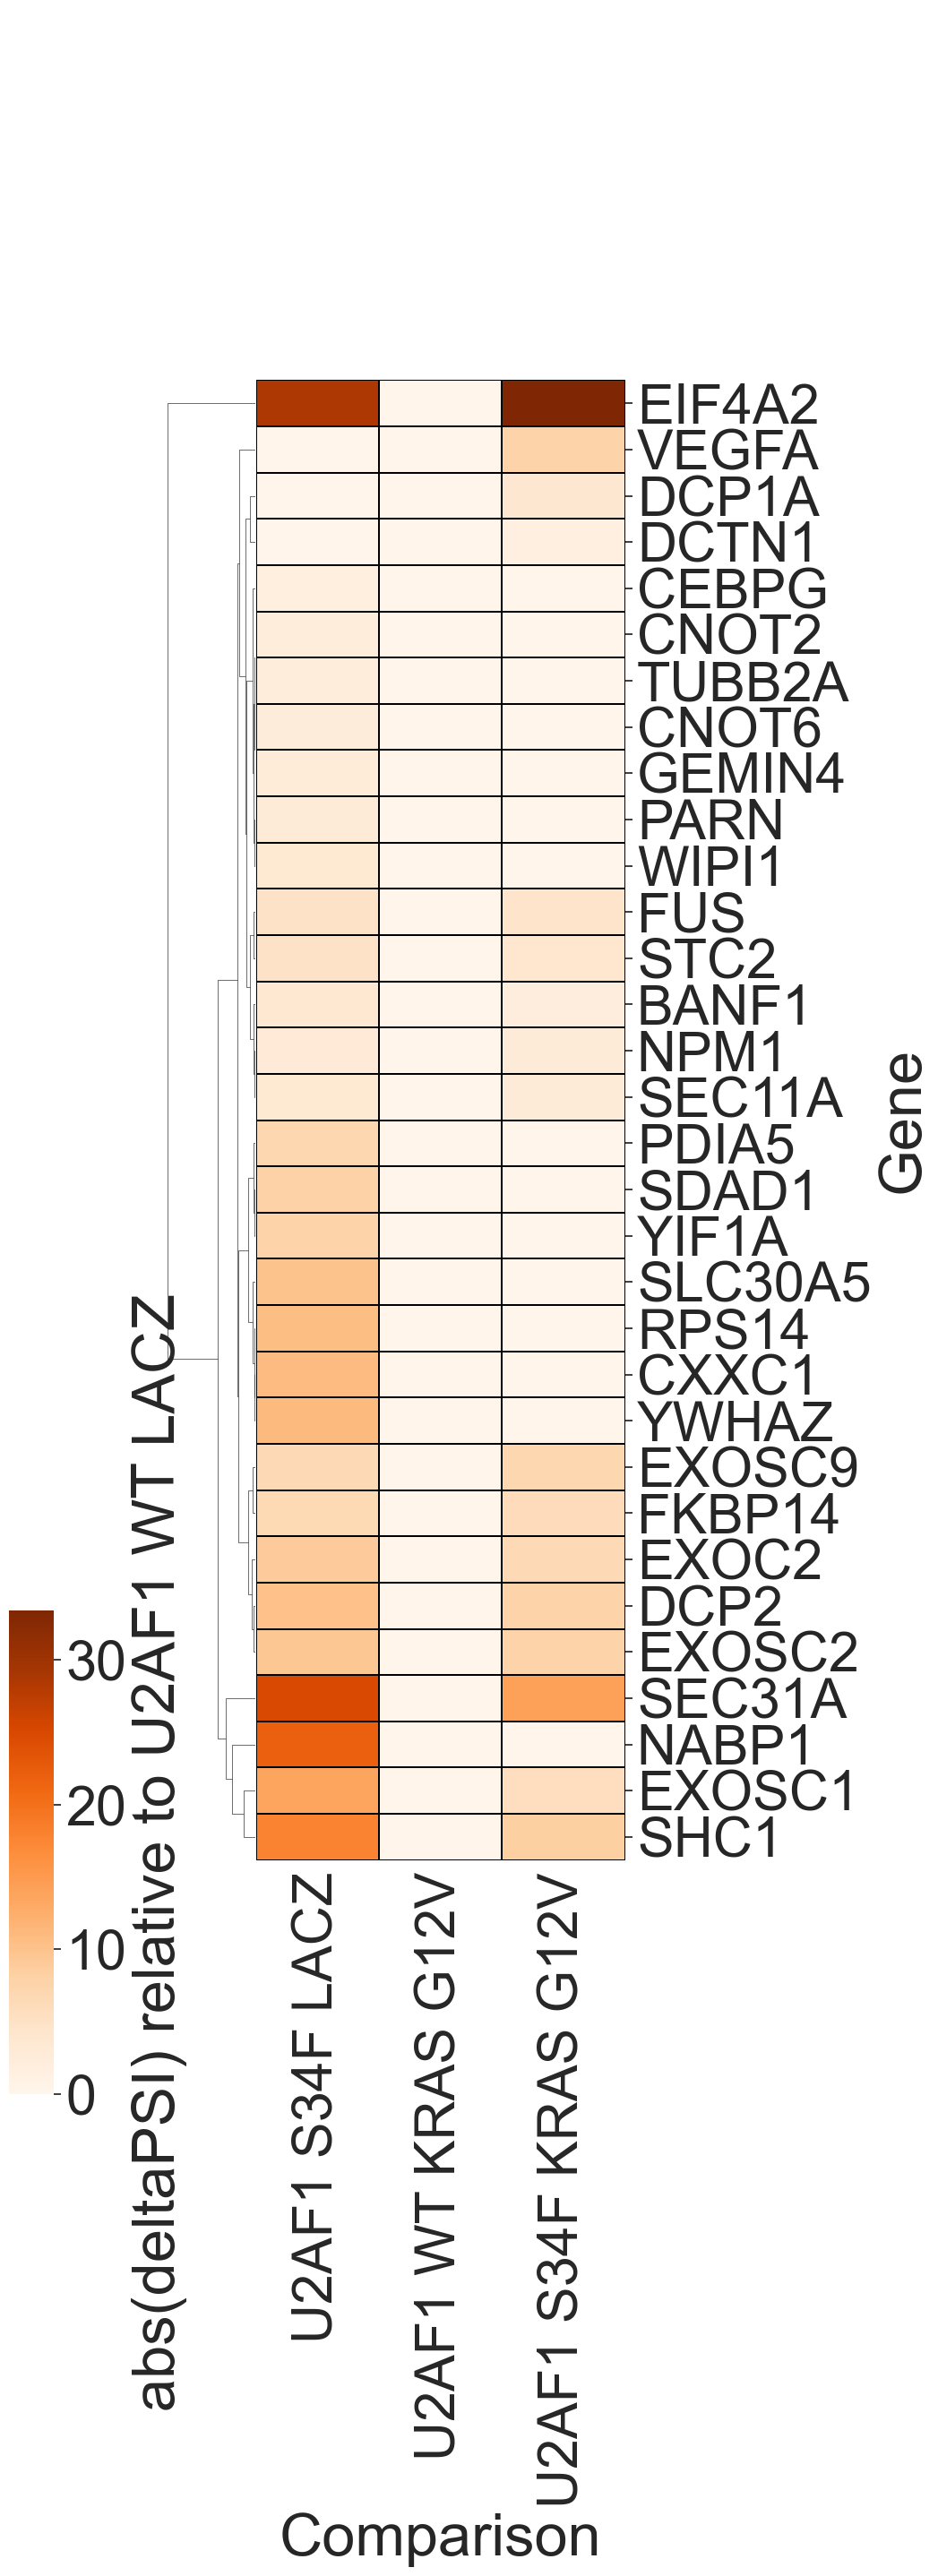

In [47]:

unfoldedproteinstr = 'ALDH18A1,ARFGAP1,ASNS,ATF3,ATF4,ATF6,ATP6V0D1,BAG3,BANF1,CALR,CCL2,CEBPB,CEBPG,CHAC1,CKS1B,CNOT2,CNOT4,CNOT6,CXXC1,DCP1A,DCP2,DCTN1,DDIT4,DDX10,DKC1,DNAJA4,DNAJB9,DNAJC3,EDC4,EDEM1,EEF2,EIF2AK3,EIF2S1,EIF4A1,EIF4A2,EIF4A3,EIF4E,EIF4EBP1,EIF4G1,ERN1,ERO1A,EXOC2,EXOSC1,EXOSC10,EXOSC2,EXOSC4,EXOSC5,EXOSC9,FKBP14,FUS,GEMIN4,GOSR2,H2AX,HERPUD1,HSP90B1,HSPA5,HSPA9,HYOU1,IARS1,IFIT1,IGFBP1,IMP3,KDELR3,KHSRP,KIF5B,LSM1,LSM4,MTHFD2,NFYA,NFYB,NHP2,NOLC1,NOP14,NOP56,NPM1,NABP1,PAIP1,PARN,PDIA5,PDIA6,POP4,PREB,PSAT1,RPS14,RRP9,SDAD1,SEC11A,SEC31A,SERP1,SHC1,MTREX,SLC1A4,SLC30A5,SLC7A5,SPCS1,SPCS3,SRPRA,SRPRB,SSR1,STC2,TARS1,TATDN2,TSPYL2,SKIC3,TUBB2A,VEGFA,WFS1,WIPI1,XBP1,XPOT,YIF1A,YWHAZ,ZBTB17'

unfoldedproteinset = set(unfoldedproteinstr.split(','))
unfoldedproteinlist = unfoldedproteinstr.split(',')

sns.set(font_scale=4)

#combine dataframes for gene level heatmap
dflist = [s34flacz_RNK, s34fkv12_RNK, wtkv12_RNK]
for df in dflist:
    df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)

s34flacz_RNK['Comparison'] = 'U2AF1 S34F LACZ'
wtkv12_RNK['Comparison'] = 'U2AF1 WT KRAS G12V'
s34fkv12_RNK['Comparison'] = 'U2AF1 S34F KRAS G12V'

#concat dataframes
s34flacz_wtkv12 = pd.concat([s34flacz_RNK, wtkv12_RNK], ignore_index=True)
s34flacz_wtkv12_s34fkv12 = pd.concat([s34fkv12_RNK, s34flacz_wtkv12], ignore_index=True)

unfoldedPSI_df = s34flacz_wtkv12_s34fkv12[s34flacz_wtkv12_s34fkv12['Gene'].isin(unfoldedproteinlist)]

# #pivot dataframes for heatmap
heatmap_df = pd.pivot_table(unfoldedPSI_df, values='abs(dPSI)', index='Gene', columns='Comparison')

# reorder columns for plotting
column_order = ['U2AF1 S34F LACZ', 'U2AF1 WT KRAS G12V', 'U2AF1 S34F KRAS G12V']
heatmap_df = heatmap_df.reindex(column_order, axis=1)

heatmap_df = heatmap_df.fillna(0)

cg = sns.clustermap(heatmap_df, figsize=(10, 30), xticklabels=True, yticklabels=True, col_cluster=False, linecolor='black', 
               linewidths = 0.01, 
                    cmap="Oranges", 
                    cbar_pos=(-.1, .2, 0.05, 0.18),
                    cbar_kws = {'label':'abs(deltaPSI) relative to U2AF1 WT LACZ'})
# cg.savefig("Downloads/krasdn_dpsi_heatmap.pdf", format='pdf', transparent=True
plt.savefig("/Downloads/bothclones_unfoldedprot_dpsi_heatmap.pdf.pdf", format='pdf', transparent=True)


In [48]:
#clean up SG list to only get gene names

#Stress granule protein gene list
sgproteindf = pd.read_csv('/Downloads/Protein_sgs.GMX', sep='\t')

sg1 = sgproteindf['SG_pr Markmiller_4'].tolist()
sg2 = sgproteindf['SG_pr Jain_1'].tolist()
sg3 = sgproteindf['SG_pr Jain_2'].tolist()
sg4 = sgproteindf['SG_pr Khong'].tolist()
sg5 = sgproteindf['SG_pr Markmiller_1'].tolist()
sg6 = sgproteindf['SG_pr Markmiller_2'].tolist()
sg7 = sgproteindf['SG_pr Markmiller_3'].tolist()
sg8 = sgproteindf['SG_pr Markmiller_4'].tolist()
sg9 = sgproteindf['SG_pr MarmorKollet_1'].tolist()
sg10 = sgproteindf['SG_pr MarmorKollet_2'].tolist()
sg11 = sgproteindf['SG_pr Youn'].tolist()


proteinSGscombined = sg1 + sg2 + sg3 + sg4 + sg5 + sg6 + sg7 + sg8 + sg9 + sg10 + sg11
    
proteinSGscombined = [i for i in proteinSGscombined if i != 'na']
proteinSGscombined = [i for i in proteinSGscombined if str(i) != 'nan']

proteinSGset = set(proteinSGscombined)

In [49]:
u2af1bind = pd.read_csv('/Downloads/Supplementary_Table_3 - Sheet1.csv')

u2af1_bind_list = u2af1bind['transcript']
u2af1_bind_list

0           SEPT2
1            IPO7
2            NPM1
3           SRP72
4           RAB4A
          ...    
1112         ATN1
1113       MALAT1
1114         AGO2
1115    HNRNPA1L2
1116       HNRNPK
Name: transcript, Length: 1117, dtype: object

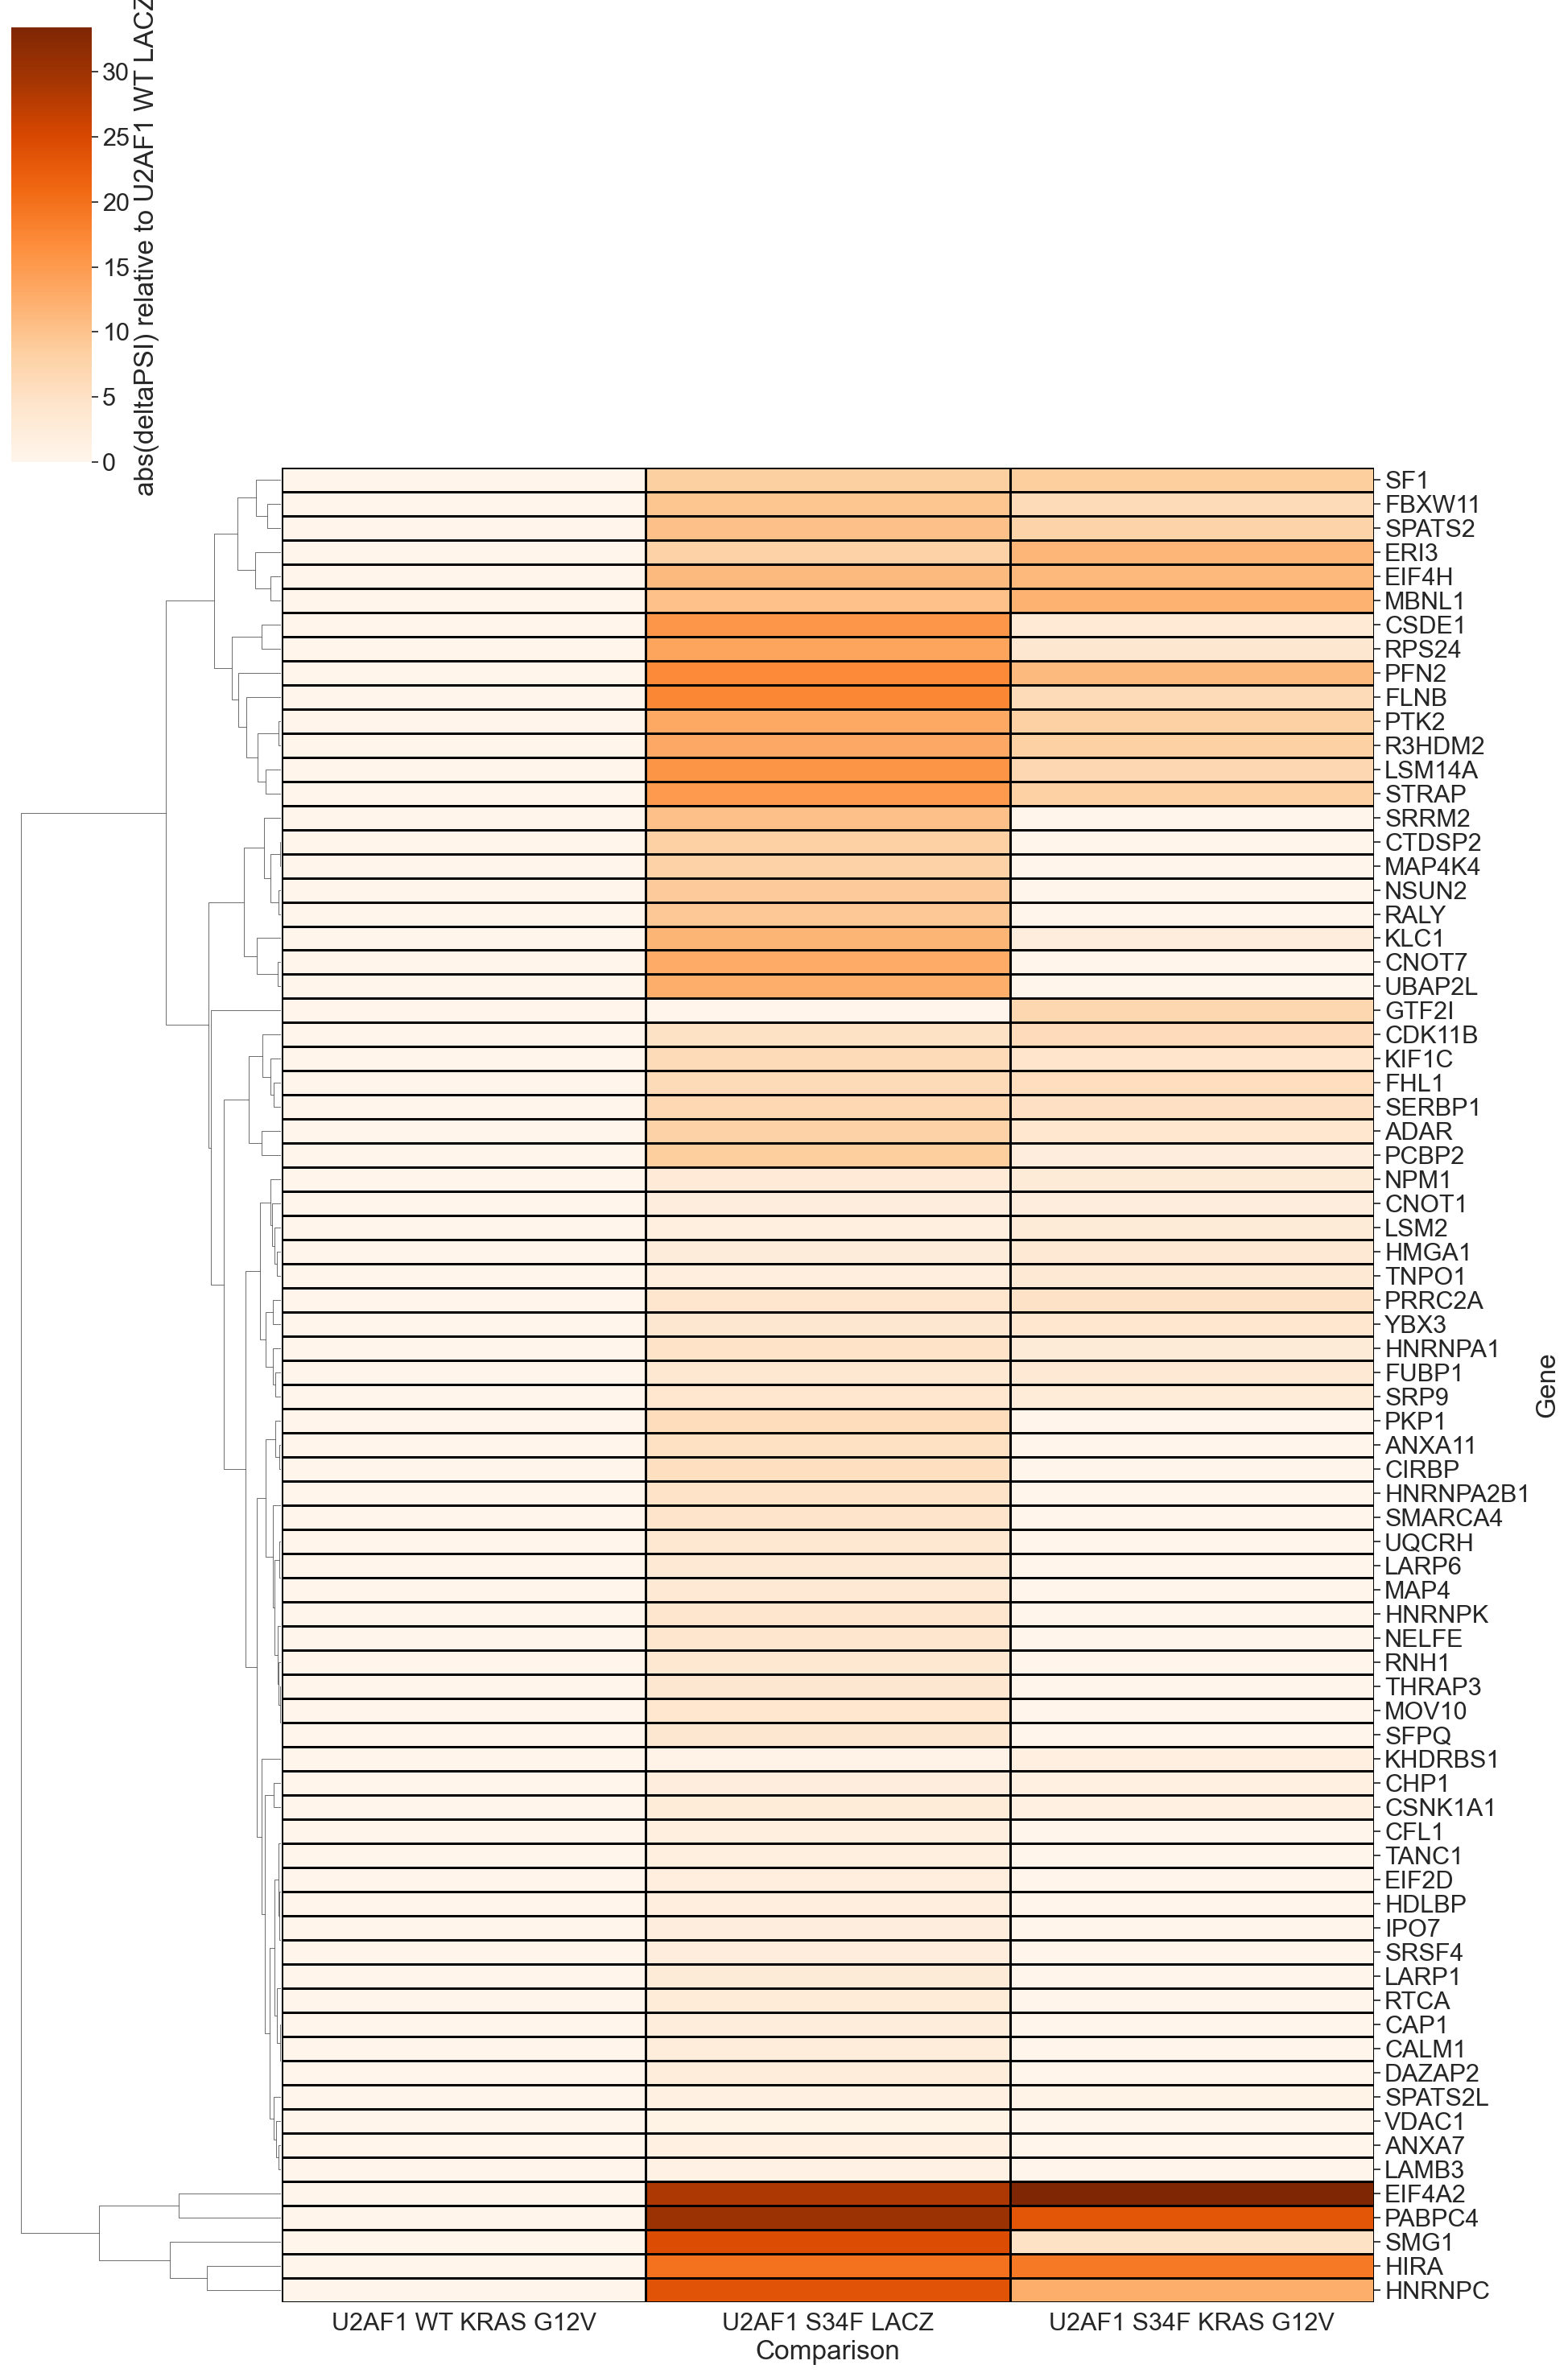

In [87]:
sns.set(font_scale=2)


dflist = [s34flacz_RNK, s34fkv12_RNK, wtkv12_RNK]

for df in dflist:
    df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)

s34flacz_RNK = s34flacz_RNK.loc[s34flacz_RNK['Gene'].isin(u2af1_bind_list)]
s34fkv12_RNK = s34fkv12_RNK.loc[s34fkv12_RNK['Gene'].isin(u2af1_bind_list)]
wtkv12_RNK = wtkv12_RNK.loc[wtkv12_RNK['Gene'].isin(u2af1_bind_list)]

    
s34flacz_RNK['Comparison'] = 'U2AF1 S34F LACZ'
wtkv12_RNK['Comparison'] = 'U2AF1 WT KRAS G12V'
s34fkv12_RNK['Comparison'] = 'U2AF1 S34F KRAS G12V'

#concat dataframes
s34flacz_wtkv12 = pd.concat([s34flacz_RNK, wtkv12_RNK], ignore_index=True)
s34flacz_wtkv12_s34fkv12 = pd.concat([s34fkv12_RNK, s34flacz_wtkv12], ignore_index=True)
# s34flacz_wtkv12_s34fkv12

#filter for cols that correspond to gene in sg protein 
sg_df = s34flacz_wtkv12_s34fkv12[s34flacz_wtkv12_s34fkv12['Gene'].isin(proteinSGset)]

#pivot dataframes for heatmap
heatmap_df = pd.pivot_table(sg_df, values='abs(dPSI)', index='Gene', columns='Comparison')

#reorder columns for plotting
column_order = ['U2AF1 WT KRAS G12V','U2AF1 S34F LACZ', 'U2AF1 S34F KRAS G12V']
heatmap_df = heatmap_df.reindex(column_order, axis=1)

#check if there's anything with value = 0
# heatmap_df[heatmap_df.isin([0]).any(axis=1)]

heatmap_df = heatmap_df.fillna(0)

cg = sns.clustermap(heatmap_df, figsize= (20, 30), xticklabels=True, yticklabels=True, col_cluster=False, linecolor='black', 
                    linewidths = 1, 
                    cmap="Oranges",
                    cbar_kws = {'label':'abs(deltaPSI) relative to U2AF1 WT LACZ'})
# cg.savefig("Downloads/sg_dpsi_heatmap.pdf", format='pdf', transparent=True) 
# plt.savefig("/Users/selammehreteab/Downloads/bothclones_sg_dpsi_heatmap.pdf", format='pdf', transparent=True)
# cg.ax_cbar.set_position([-.1, .2, 0.05, 0.18])
cg.figure.savefig("/Downloads/bothclones_sg_splicing_heatmap.pdf", format='pdf', transparent=True)
